# The Timing of the COVID-19 Peak in the SIR Model
Matthew L Ferguson,
Associate Professor of Physics, 
Boise State University

with

Bruce N Miller,
Emeritus Professor of Physics, 
Texas Christian University

March 26, 2020

https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#Exact_analytical_solutions_to_the_SIR_model
Following notation from the above linked page.

At the peak:
$ \frac{dI}{dt}=\left(R_0 \frac{S}{N}-1\right)\gamma I=0$
therefore
$S_{max}=\frac{N}{R_0}$
is the value of $S$ at maximum.

Following the analytical solution of Harko et al.(2014)

$t_{max}=\int_{u_{max}}^1\frac{N}{\gamma R_0 s \left(N-R(0)+\frac{N}{R_0} ln(s) - S(0) s\right)}ds$ where $u_{max}=\frac{S_{max}}{S(0)}=\frac{N}{R_0 S(0)}$

$I_{max}=I(0)+S(0)-\frac{1+log(R_0 S(0))}{R_0}$

 Harko, Tiberiu; Lobo, Francisco S. N.; Mak, M. K. (2014). "Exact analytical solutions of the Susceptible-Infected-Recovered (SIR) epidemic model and of the SIR model with equal death and birth rates". Applied Mathematics and Computation. 236: 184–194. arXiv:1403.2160. Bibcode:2014arXiv1403.2160H. doi:10.1016/j.amc.2014.03.030.

In [1]:
import numpy as np

def SIR(s,i,r,Ro,Tr,a,b):

    def s_prime(s):
        return  -beta*i*s
    def i_prime(i):
        return  beta*i*s-gamma*i
    def r_prime(r):
        return  gamma*i

    #def f(x,t):
    #    return -x**3 + np.sin(t)

    a = start         # Start of the interval in days
    b = end      # End of the interval in days
    T = (b-a)     # Number of steps
    h = (b-a)/T        # Size of a single step

    N = s+i+r
    beta = Ro/Tr/N   #COVID-19,14days,100k
    gamma = 1/Tr      #

    #create the array of time values and (empty) x-values, and loop over 
    #all times supplementing x each time
    tpoints = np.arange(a,b,h)
    spoints = []
    ipoints = []
    rpoints = []

    for t in tpoints:
        spoints.append(s)
        ipoints.append(i)
        rpoints.append(r)
        s += h*s_prime(s)
        i += h*i_prime(i)
        r += h*r_prime(r)

    return [tpoints,spoints,ipoints,rpoints]


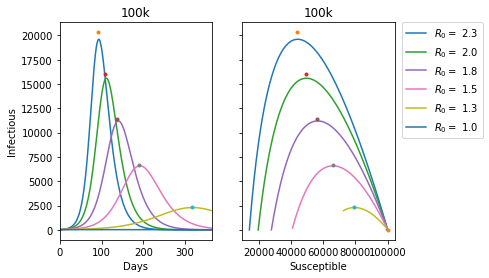

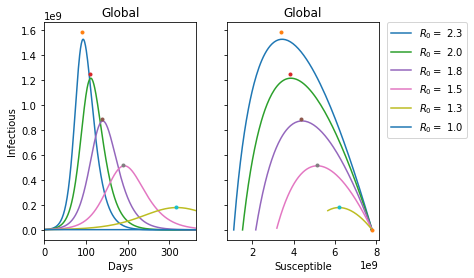

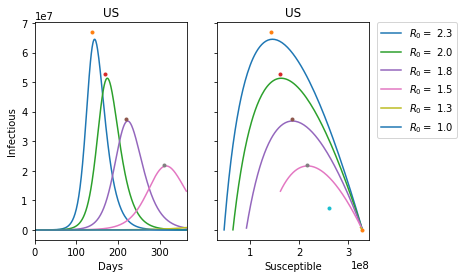

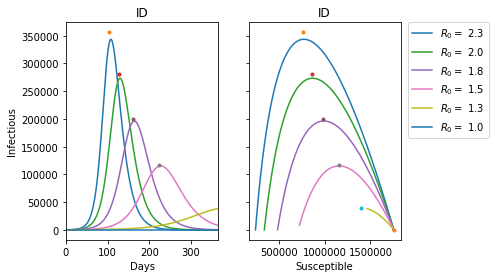

,$R_0$,$T_r$,$\frac{T_r}{R_0}$,$t_{max}$,$I_{max}$
100k,,,,,
no mitigation,2.3,14.0,6.1,90.4,"20,320.0"
school closure,2.0,14.0,6.9,108.9,"16,045.2"
social distancing,1.8,14.0,7.9,137.7,"11,441.6"
shelter in place,1.5,14.0,9.2,189.7,"6,681.9"
school closure+social distancing,1.3,14.0,11.1,316.0,"2,314.8"
school closure+shelter in place,1.0,14.0,14.0,-14.7,28.2
,$R_0$,$T_r$,$\frac{T_r}{R_0}$,$t_{max}$,$I_{max}$
Global,,,,,
no mitigation,2.3,14.0,6.1,90.4,"1,584,961,623.9"


In [2]:
%matplotlib inline
def SIR_peak(s,i,r,Ro,Tr,start,end,title=''):
    #get_ipython().magic('matplotlib inline')
    import numpy as np
    import scipy.integrate as integrate
    import matplotlib.pyplot as plt

    def SIR_tmax(s,i,r,Ro,Tr):
        N=s+i+r
        tmax=integrate.quad(lambda x: N*Tr/Ro/x/(N-r+N/Ro*(np.log(x))-s*x), N/Ro/s, 1.)
        return tmax

    def SIR_imax(s,i,r,Ro,Tr):
        N=s+i+r
        imax=i/N+s/N-(1+np.log(Ro*s/N))/Ro
        return imax*N

        def s_prime(s):
            return  -beta*i*s
        def i_prime(i):
            return  beta*i*s-gamma*i
        def r_prime(r):
            return  gamma*i

        #def f(x,t):
        #    return -x**3 + np.sin(t)

        a = start        # Start of the interval in days
        b = end      # End of the interval in days
        T = (b-a)     # Number of steps
        h = (b-a)/T        # Size of a single step

        N = s+i+r
        beta = Ro/Tr/N   #COVID-19,14days,100k
        gamma = 1/Tr      #

        #create the array of time values and (empty) x-values, and loop over 
        #all times supplementing x each time
        tpoints = np.arange(a,b,h)
        spoints = []
        ipoints = []
        rpoints = []

        for t in tpoints:
            spoints.append(s)
            ipoints.append(i)
            rpoints.append(r)
            s += h*s_prime(s)
            i += h*i_prime(i)
            r += h*r_prime(r)

        return [tpoints,spoints,ipoints,rpoints] 

    N = s+i+r

    #print(r'$R_0 \beta \gamma$')
    import pandas as pd
    num=6
    Ros=np.linspace(Ro, 1, 6)
    #Ros = np.arange(Ro,1.,(1.-Ro)/(num))
    #Ros = np.arange(2.3,1.,-1.5/num)
    Trs = np.full(shape=len(Ros),fill_value=Tr)
    tm=[]
    im=[]

    pd.options.display.float_format = '{:,.1f}'.format

    data = []
    #plt.gca().set_prop_cycle(color=['r','r','g','g','b','b','c','c','m','m','y','y','k','k'])
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

    #plt.gca().set_prop_cycle(color=['r','g','b','c','m','y','k'])
    for Ro in Ros:
        tm.append(SIR_tmax(s,i,r,Ro,Tr)[0])
        im.append(SIR_imax(s,i,r,Ro,Tr))
        [tpoints,spoints,ipoints,rpoints]=SIR(s,i,r,Ro,Tr,start,end)
        data = {
            r'$R_0$':Ros,
            r'$T_r$':Trs,
            r'$\frac{T_r}{R_0}$':Trs/Ros,
            r'$t_{max}$':tm,
            r'$I_{max}$':im,
               }

        #plt.plot(tpoints,spoints, color = 'red' , label='Susceptible')
        #plt.legend(loc='upper right')
        #plt.ylabel("Susceptible")
        #plt.twinx()
        #plt.semilogy(tpoints,ipoints, color = 'green' , label='Infectious')
        #ax1.plot(tpoints,ipoints, label='Infectious')
        ax1.plot(tpoints,ipoints, label='$R_0=$'+' {:.1f}'.format(Ro))
        ax1.plot(tm[-1],im[-1],'.')
        ax1.set_xlim(0,365)
        ax1.set_xlabel("Days")
        ax1.set_ylabel(r"Infectious")
        ax1.set_title(title)
        #ax1.set_ylabel(r"Infectious per 100,000")
        #ax1.legend(loc='upper right')
        ax2.plot(spoints,ipoints, label='$R_0=$'+' {:.1f}'.format(Ro))
        ax2.plot(N/Ro,im[-1],'.')
        ax2.set_xlabel("Susceptible")
        ax2.set_title(title)
        ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        #plt.legend(loc='upper right')
        #plt.plot(tpoints,rpoints, color = 'blue' , label='Recovered')
        #plt.ylabel("Recovered")


    #plt.title("SIR")
    #plt.xlabel("Days")
    #plt.savefig('SIR Model.png', dpi = 300)
    #plt.show()

    #plt.plot(spoints,ipoints, color = 'red' , label='Predator')
    #plt.xlabel("Susceptible")
    #plt.ylabel("Infectious")
    plt.savefig(title+' SIR Imax.png', dpi = 300)
    plt.show()

    df = pd.DataFrame(data, index=['no mitigation','school closure','social distancing','shelter in place','school closure+social distancing','school closure+shelter in place'])
    df.index.name=title
    #df = pd.DataFrame(data, index=['no mitigation','school closure','social distancing','lock down'])
    return df

#important part
Ro = 2.3
Tr = 14.
start = 0.
end = 365.

#100k 20200326
i = 2.2e6/7.8e9*1e5    # Initial condition
s = 1e5-i  # Initial condition
r = 117.e3/7.8e9*1e5   # Initial condition
df_100k=SIR_peak(s,i,r,Ro,Tr,start,end,title='100k')


#Global 20200326
i = 2.2e6     # Initial condition
s = 7.8e9-i  # Initial condition
r = 117.e3      # Initial condition
df_world=SIR_peak(s,i,r,Ro,Tr,start,end,title='Global')

#US 20200326
i = 1046     # Initial condition
s = 329227746-i  # Initial condition
r = 619      # Initial condition
df_us=SIR_peak(s,i,r,Ro,Tr,start,end,title='US')

#Idaho 20200326
i = 138
s = 1754208-i
r = 2
df_id=SIR_peak(s,i,r,Ro,Tr,start,end,title='ID')

#pd.dataframe.concat(df_world,df_us,df_id])
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

multi_table([df_100k,df_world,df_us,df_id])

### SIR for larger Ro

### Try using SciPy's Initial Value Problem Solver (default=RK45)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

In [3]:
%matplotlib inline
import numpy as np
from scipy.integrate import solve_ivp

def SIR(s,i,r,Ro,Tr,a,b):


    #(Ro,Tr)=(5.,13.)
    (beta,gamma)=(Ro/Tr,1/Tr)

    def SIR_prime(t,sir):
        [s,i,r]=sir
        N=s+i+r
        return [-beta*i*s/N, beta*i*s/N-gamma*i,gamma*i]

    sol = solve_ivp(SIR_prime, [a, b], [s,i,r], dense_output=True)

    t = np.linspace(a, b, b-a)
    (s,i,r) = sol.sol(t)

    return [t,s,i,r]

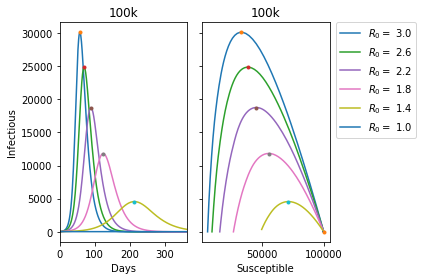

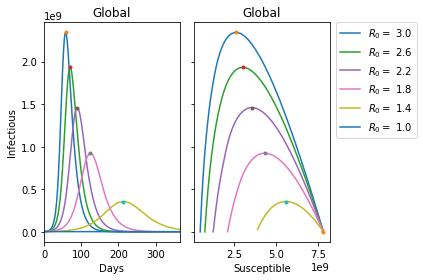

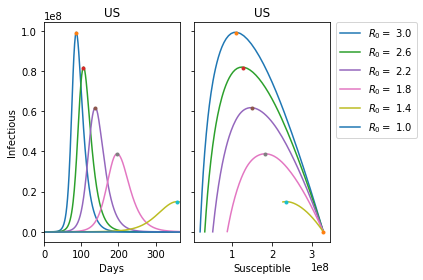

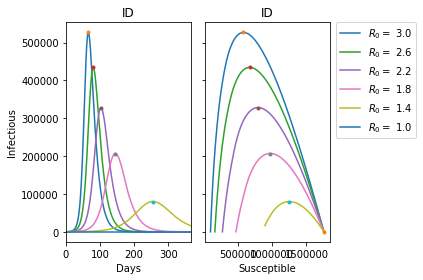

,$R_0$,$T_r$,$\frac{T_r}{R_0}$,$t_{max}$,$I_{max}$
100k,,,,,
no mitigation,3.0,12.9,4.3,57.7,"30,055.7"
school closure,2.6,12.9,5.0,69.8,"24,798.9"
social distancing,2.2,12.9,5.9,89.1,"18,719.3"
shelter in place,1.8,12.9,7.2,124.3,"11,805.3"
school closure+social distancing,1.4,12.9,9.2,213.3,"4,557.8"
school closure+shelter in place,1.0,12.9,12.9,-12.9,28.2
,$R_0$,$T_r$,$\frac{T_r}{R_0}$,$t_{max}$,$I_{max}$
Global,,,,,
no mitigation,3.0,12.9,4.3,57.7,"2,344,298,651.6"


In [4]:
def SIR_peak(s,i,r,Ro,Tr,start,end,title=''):
    #get_ipython().magic('matplotlib inline')
    import numpy as np
    import matplotlib.pyplot as plt

    def SIR_tmax(s,i,r,Ro,Tr):
        import scipy.integrate as integrate
        N=s+i+r
        tmax=integrate.quad(lambda x: N*Tr/Ro/x/(N-r+N/Ro*(np.log(x))-s*x), N/Ro/s, 1.)
        return tmax

    def SIR_imax(s,i,r,Ro,Tr):
        N=s+i+r
        imax=i/N+s/N-(1+np.log(Ro*s/N))/Ro
        return imax*N

        def s_prime(s):
            return  -beta*i*s
        def i_prime(i):
            return  beta*i*s-gamma*i
        def r_prime(r):
            return  gamma*i

        #def f(x,t):
        #    return -x**3 + np.sin(t)

        a = start        # Start of the interval in days
        b = end      # End of the interval in days
        T = (b-a)     # Number of steps
        h = (b-a)/T        # Size of a single step

        N = s+i+r
        beta = Ro/Tr/N   #COVID-19,14days,100k
        gamma = 1/Tr      #

        #create the array of time values and (empty) x-values, and loop over 
        #all times supplementing x each time
        tpoints = np.arange(a,b,h)
        spoints = []
        ipoints = []
        rpoints = []

        for t in tpoints:
            spoints.append(s)
            ipoints.append(i)
            rpoints.append(r)
            s += h*s_prime(s)
            i += h*i_prime(i)
            r += h*r_prime(r)

        return [tpoints,spoints,ipoints,rpoints] 

    N = s+i+r

    #print(r'$R_0 \beta \gamma$')
    import pandas as pd
    num=6
    Ros = np.linspace(Ro, 1, 6)
    #Ros = np.arange(2.3,1.,-1.5/num)
    Trs = np.full(shape=len(Ros),fill_value=Tr)
    tm=[]
    im=[]

    pd.options.display.float_format = '{:,.1f}'.format

    data = []
    #plt.gca().set_prop_cycle(color=['r','r','g','g','b','b','c','c','m','m','y','y','k','k'])
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

    #plt.gca().set_prop_cycle(color=['r','g','b','c','m','y','k'])
    for Ro in Ros:
        tm.append(SIR_tmax(s,i,r,Ro,Tr)[0])
        im.append(SIR_imax(s,i,r,Ro,Tr))
        [tpoints,spoints,ipoints,rpoints]=SIR(s,i,r,Ro,Tr,start,end)
        data = {
            r'$R_0$':Ros,
            r'$T_r$':Trs,
            r'$\frac{T_r}{R_0}$':Trs/Ros,
            r'$t_{max}$':tm,
            r'$I_{max}$':im,
               }

        #plt.plot(tpoints,spoints, color = 'red' , label='Susceptible')
        #plt.legend(loc='upper right')
        #plt.ylabel("Susceptible")
        #plt.twinx()
        #plt.semilogy(tpoints,ipoints, color = 'green' , label='Infectious')
        #ax1.plot(tpoints,ipoints, label='Infectious')
        ax1.plot(tpoints,ipoints, label='$R_0=$'+' {:.1f}'.format(Ro))
        ax1.plot(tm[-1],im[-1],'.')
        ax1.set_xlim(start,end)
        ax1.set_xlabel("Days")
        ax1.set_ylabel(r"Infectious")
        ax1.set_title(title)
        #ax1.set_ylabel(r"Infectious per 100,000")
        #ax1.legend(loc='upper right')
        ax2.plot(spoints,ipoints, label='$R_0=$'+' {:.1f}'.format(Ro))
        ax2.plot(N/Ro,im[-1],'.')
        ax2.set_xlabel("Susceptible")
        ax2.set_title(title)
        ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        #plt.legend(loc='upper right')
        #plt.plot(tpoints,rpoints, color = 'blue' , label='Recovered')
        #plt.ylabel("Recovered")


    #plt.title("SIR")
    #plt.xlabel("Days")
    #plt.savefig('SIR Model.png', dpi = 300)
    #plt.show()

    #plt.plot(spoints,ipoints, color = 'red' , label='Predator')
    #plt.xlabel("Susceptible")
    #plt.ylabel("Infectious")
    plt.tight_layout()
    plt.savefig(title+' SIR Imax.png', dpi = 300)
    plt.show()

    df = pd.DataFrame(data, index=['no mitigation','school closure','social distancing','shelter in place','school closure+social distancing','school closure+shelter in place'])
    df.index.name=title
    #df = pd.DataFrame(data, index=['no mitigation','school closure','social distancing','lock down'])
    return df

#important part
Ro = 3
Tr = 12.9
start = 0.
end = 365.

#100k 20200326
i = 2.2e6/7.8e9*1e5    # Initial condition
s = 1e5-i  # Initial condition
r = 0   # Initial condition
df_100k=SIR_peak(s,i,r,Ro,Tr,start,end,title='100k')


#Global 20200326
i = 2.2e6     # Initial condition
s = 7.8e9-i  # Initial condition
r = 117.e3      # Initial condition
df_world=SIR_peak(s,i,r,Ro,Tr,start,end,title='Global')

#US 20200326
i = 1046     # Initial condition
s = 329227746-i  # Initial condition
r = 619      # Initial condition
df_us=SIR_peak(s,i,r,Ro,Tr,start,end,title='US')

#Idaho 20200326
i = 138
s = 1754208-i
r = 2
df_id=SIR_peak(s,i,r,Ro,Tr,start,end,title='ID')

#pd.dataframe.concat(df_world,df_us,df_id])
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )
multi_table([df_100k,df_world,df_us,df_id])

### Calculate $I_{max}$ and $t_{max}$ vs. $R_0$ and $I_0$

/Users/mattferguson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/Users/mattferguson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  import sys
/Users/mattferguson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


<Figure size 432x288 with 0 Axes>

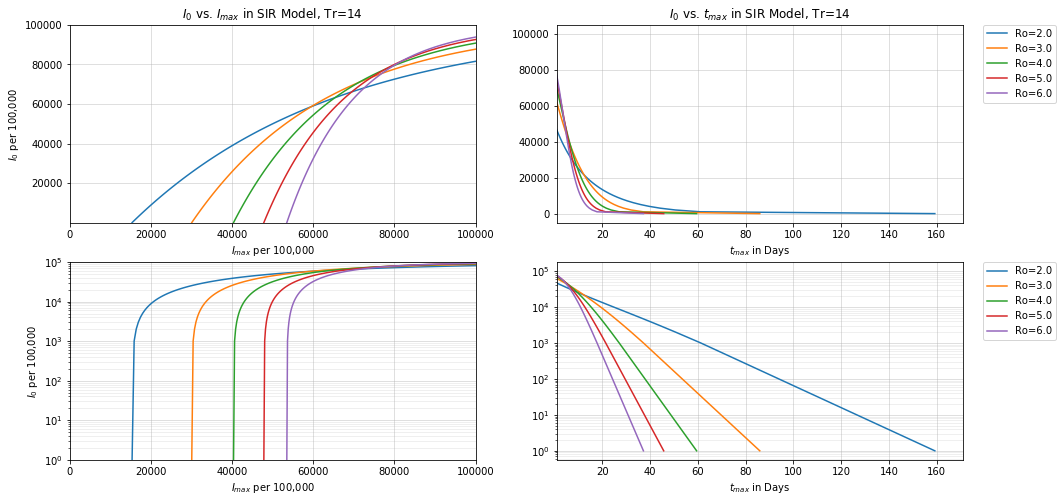

In [69]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

def SIR_tmax(s,i,r,Ro,Tr):
    N=s+i+r
    tmax=integrate.quad(lambda x: N*Tr/Ro/x/(N-r+N/Ro*(np.log(x))-s*x), N/Ro/s, 1.)
    return tmax[0]

def SIR_imax(s,i,r,Ro,Tr):
    N=s+i+r
    imax=i/N+s/N-(1+np.log(Ro*s/N))/Ro
    return imax*N

N=1e5
#Ro=2.3
Ros=np.linspace(2,6,5)
Tr=14
npoints=100
i=np.linspace(1,100000,npoints)
r=np.repeat(0,npoints)
s=N-i
plt.tight_layout()
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(16,8))
#plt.title('$I_0$ vs. $I_{max}$ and $t_{max}$ in SIR Model')

for Ro in Ros:
    tmax=[];imax=[]
    for j in np.arange(len(i)):
        tmax.append(SIR_tmax(s[j],i[j],r[j],Ro,Tr))
        imax.append(SIR_imax(s[j],i[j],r[j],Ro,Tr))
    #print(tmax)
    ax1.plot(imax,i,label='Ro={:.1f}'.format(Ro))
    ax1.set_ylim(1,1e5)
    ax1.set_xlabel(r'$I_{max}$ per 100,000')
    ax1.set_ylabel(r'$I_0$ per 100,000')
    ax1.grid(which='minor',alpha=0.25)
    ax1.grid(which='major',alpha=0.5)
    ax1.set_xlim(0,100000)
    ax1.set_title('$I_0$ vs. $I_{max}$ in SIR Model, Tr=14')
    
    ax2.plot(tmax,i,label='Ro={:.1f}'.format(Ro))
    ax2.set_xlim(1)
    ax2.set_xlabel(r'$t_{max}$ in Days')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax2.grid(which='minor',alpha=0.25)
    ax2.grid(which='major',alpha=0.5)
    ax2.set_title('$I_0$ vs. $t_{max}$ in SIR Model, Tr=14')

    ax3.semilogy(imax,i,label='Ro={:.1f}'.format(Ro))
    ax3.set_ylim(1,1e5)
    ax3.set_xlabel(r'$I_{max}$ per 100,000')
    ax3.set_ylabel(r'$I_0$ per 100,000')
    ax3.grid(which='minor',alpha=0.25)
    ax3.grid(which='major',alpha=0.5)
    ax3.set_xlim(0,100000)
    #ax3.set_title('$I_0$ vs. $I_{max}$ in SIR Model, Tr=14')
    
    ax4.semilogy(tmax,i,label='Ro={:.1f}'.format(Ro))
    ax4.set_xlim(1)
    ax4.set_xlabel(r'$t_{max}$ in Days')
    ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax4.grid(which='minor',alpha=0.25)
    ax4.grid(which='major',alpha=0.5)
    #ax4.set_title('$I_0$ vs. $t_{max}$ in SIR Model, Tr=14')
    
    plt.savefig('Imax_tmax_SIR_Model.png')
